In [1]:
#Load packages
import re
import numpy as np
import pandas as pd
import geopandas as gpd
import numpy as np
import itertools

from scipy import linalg
import sklearn
from sklearn.datasets import make_blobs, make_circles, make_moons

import plotly_express as px

import matplotlib as mpl
from matplotlib import pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from numpy import random
import seaborn as sns
import matplotlib.pyplot as plt 


import altair as alt
np.random.seed(31)
%matplotlib inline

In [2]:
#Load datasets
#Import working_dataset 
X_train = pd.read_csv('/rds/general/user/md2620/home/ML_project/X_train_encoded.csv')
X_test = pd.read_csv('/rds/general/user/md2620/home/ML_project/X_test_encoded.csv')
y_train = pd.read_csv('/rds/general/user/md2620/home/ML_project/y_train_encoded.csv')
y_test = pd.read_csv('/rds/general/user/md2620/home/ML_project/y_test_encoded.csv')

In [3]:
#Print the shapes of each dataset
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8002, 323)
(2668, 323)
(8002, 2)
(2668, 2)


In [4]:
#Concatenate them all together for clustering analysis
X = pd.concat([X_train, X_test],axis=0)

In [5]:
X.shape

(10670, 323)

In [6]:
y = pd.concat([y_train, y_test],axis=0)

In [7]:
y.shape

(10670, 2)

In [8]:
df = pd.concat([X, y],axis=1)

In [9]:
df.shape

(10670, 325)

In [10]:
df.head(5)

,SEQN,LBDSALSI,LBXSATSI,LBXSASSI,LBXSAPSI,LBDSBUSI,LBDSCASI,LBDSCHSI,LBXSC3SI,LBDSCRSI,...,SMD100BR_TUCSON,SMD100BR_VIRGINIA SLIMS,SMD100BR_VIRGINIA SLIMS ULTRA LIGHT,SMD100BR_WINGS,SMD410_No,SMD410_Yes,SMQ680_No,SMQ680_Yes,SEQN,casecont
0,58640.0,9.691139e-01,-0.308545,0.026750,-0.545771,3.434071e-01,1.836622e-01,-2.160481e-02,-6.898926e-01,2.696508e-01,...,0,0,0,0,1,0,1,0,58640.0,0
1,71717.0,-4.619780e-01,-0.479643,-0.708059,-0.566575,-8.001147e-01,-1.561095e-01,-8.152819e-02,1.598887e+00,-5.395014e-01,...,0,0,0,0,0,1,0,1,71717.0,0
2,80552.0,2.535680e-01,-0.992937,-0.708059,-1.024264,5.733892e-01,-4.958812e-01,6.828027e-02,-1.176976e-01,1.301636e-01,...,0,0,0,0,0,0,0,0,80552.0,1
3,55159.0,-2.542130e-15,0.000000,0.000000,0.000000,-3.858340e-14,3.017779e-14,-1.023513e-15,2.032845e-15,3.587752e-15,...,0,0,0,0,1,0,0,0,55159.0,0
4,54023.0,6.113409e-01,0.290297,1.286424,-0.254515,-1.165570e-01,8.632057e-01,-1.392928e+00,1.026692e+00,1.301636e-01,...,0,0,0,0,1,0,1,0,54023.0,0


In [11]:
df.drop(['SEQN'],axis=1, inplace=True)

In [12]:
df.head(5)

,LBDSALSI,LBXSATSI,LBXSASSI,LBXSAPSI,LBDSBUSI,LBDSCASI,LBDSCHSI,LBXSC3SI,LBDSCRSI,LBXSGTSI,...,SMD100BR_SENECA,SMD100BR_TUCSON,SMD100BR_VIRGINIA SLIMS,SMD100BR_VIRGINIA SLIMS ULTRA LIGHT,SMD100BR_WINGS,SMD410_No,SMD410_Yes,SMQ680_No,SMQ680_Yes,casecont
0,9.691139e-01,-0.308545,0.026750,-0.545771,3.434071e-01,1.836622e-01,-2.160481e-02,-6.898926e-01,2.696508e-01,-0.347502,...,0,0,0,0,0,1,0,1,0,0
1,-4.619780e-01,-0.479643,-0.708059,-0.566575,-8.001147e-01,-1.561095e-01,-8.152819e-02,1.598887e+00,-5.395014e-01,0.595319,...,0,0,0,0,0,0,1,0,1,0
2,2.535680e-01,-0.992937,-0.708059,-1.024264,5.733892e-01,-4.958812e-01,6.828027e-02,-1.176976e-01,1.301636e-01,-0.426071,...,0,0,0,0,0,0,0,0,0,1
3,-2.542130e-15,0.000000,0.000000,0.000000,-3.858340e-14,3.017779e-14,-1.023513e-15,2.032845e-15,3.587752e-15,0.000000,...,0,0,0,0,0,1,0,0,0,0
4,6.113409e-01,0.290297,1.286424,-0.254515,-1.165570e-01,8.632057e-01,-1.392928e+00,1.026692e+00,1.301636e-01,-0.583208,...,0,0,0,0,0,1,0,1,0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10670 entries, 0 to 2667
Columns: 323 entries, LBDSALSI to casecont
dtypes: float64(45), int64(278)
memory usage: 26.4 MB


In [14]:
df_numeric = df.select_dtypes(exclude='int64')

In [15]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10670 entries, 0 to 2667
Data columns (total 45 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LBDSALSI  10670 non-null  float64
 1   LBXSATSI  10670 non-null  float64
 2   LBXSASSI  10670 non-null  float64
 3   LBXSAPSI  10670 non-null  float64
 4   LBDSBUSI  10670 non-null  float64
 5   LBDSCASI  10670 non-null  float64
 6   LBDSCHSI  10670 non-null  float64
 7   LBXSC3SI  10670 non-null  float64
 8   LBDSCRSI  10670 non-null  float64
 9   LBXSGTSI  10670 non-null  float64
 10  LBDSGLSI  10670 non-null  float64
 11  LBDSIRSI  10670 non-null  float64
 12  LBXSLDSI  10670 non-null  float64
 13  LBDSPHSI  10670 non-null  float64
 14  LBDSTBSI  10670 non-null  float64
 15  LBDSTPSI  10670 non-null  float64
 16  LBDSTRSI  10670 non-null  float64
 17  LBDSUASI  10670 non-null  float64
 18  LBXSNASI  10670 non-null  float64
 19  LBXSKSI   10670 non-null  float64
 20  LBXSCLSI  10670 non-null  flo

CLUSTERING

FIND OPTIMAL EPSILON VALUE AT POINT OF MAXIMUM CURVATURE (AROUND 15 HERE)

In [15]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df)
distances, indices = nbrs.kneighbors(df)

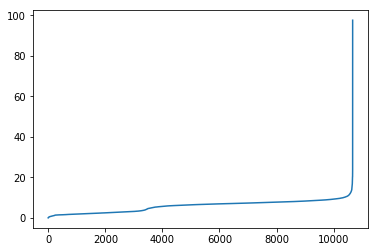

In [16]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [17]:
from sklearn.cluster import DBSCAN
# instantiating DBSCAN
dbscan = DBSCAN(eps=15, min_samples=5)
# fitting model
model = dbscan.fit(df)

In [18]:
labels = model.labels_

In [19]:
labels

array([0, 0, 0, ..., 0, 0, 0])

In [20]:
df["labels"] = labels

In [21]:
model_cluster_center = model.cluster_centers_

AttributeError: 'DBSCAN' object has no attribute 'cluster_centers_'

In [22]:
import numpy as np
from sklearn import metrics
# identify core samples
core_samples = np.zeros_like(labels, dtype=bool)
core_samples[dbscan.core_sample_indices_] = True
print(core_samples)

[ True  True  True ...  True  True  True]


In [23]:
# declare the number of clusters
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters)

2


In [24]:
print("Silhoette Coefficient: %0.3f" % metrics.silhouette_score(df, labels))

Silhoette Coefficient: 0.616


VISUALIZE

In [25]:
colors = ['maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan','navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

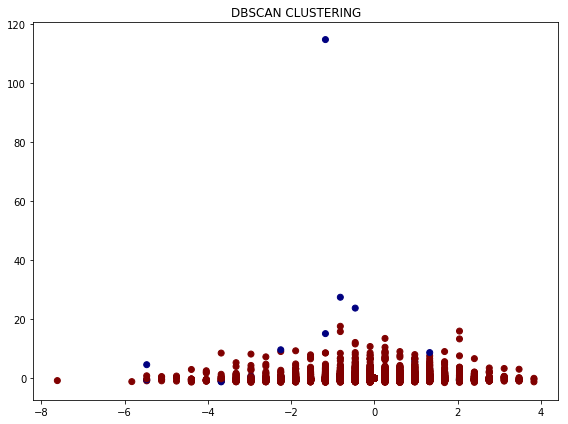

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=vectorizer(labels))
plt.title('DBSCAN CLUSTERING')
plt.tight_layout()
plt.savefig('/rds/general/user/md2620/home/ML_project/Plots/DBSCAN_Clustering')
plt.show()

In [27]:
np.unique(labels, return_counts=True)

(array([-1,  0,  1]), array([   29, 10633,     8]))

VISUALIZING THE DATA USING TSNE AND PYPLOT_EXPRESS - NOT WORKING YET

In [26]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(df_numeric)

In [27]:
df_numeric["x_component"]=X_embedded[:,0]
df_numeric["y_component"]=X_embedded[:,1]

/apps/jupyterhub/2019-04-29/miniconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/apps/jupyterhub/2019-04-29/miniconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
import plotly.express as px
    
fig = px.scatter(df_numeric, x="x_component", y="y_component")
#fig.update_layout(height=800)
fig.show()

In [118]:
import plotly
plotly.__version__

'4.14.3'

KMEANS ALGORITHM

In [29]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 40)
    kmeans.fit(df)
    # inertia method returns wcss for that model
    inertia.append(kmeans.inertia_)

/rds/general/user/md2620/home/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



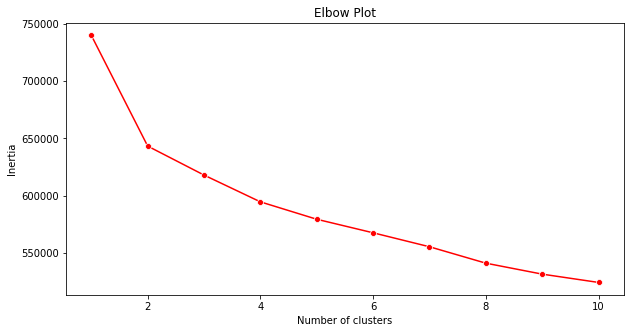

In [30]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), inertia,marker='o',color='red')
plt.title('Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [33]:
# Fitting K-Means to the dataset using 2 clusters
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 40)
y_kmeans = kmeans.fit_predict(df)

Visualization for 2 clusters

In [35]:
y_kmeans

array([0, 0, 0, ..., 0, 1, 0], dtype=int32)

In [39]:
df = np.array(df)

/rds/general/user/md2620/home/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/rds/general/user/md2620/home/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/rds/general/user/md2620/home/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



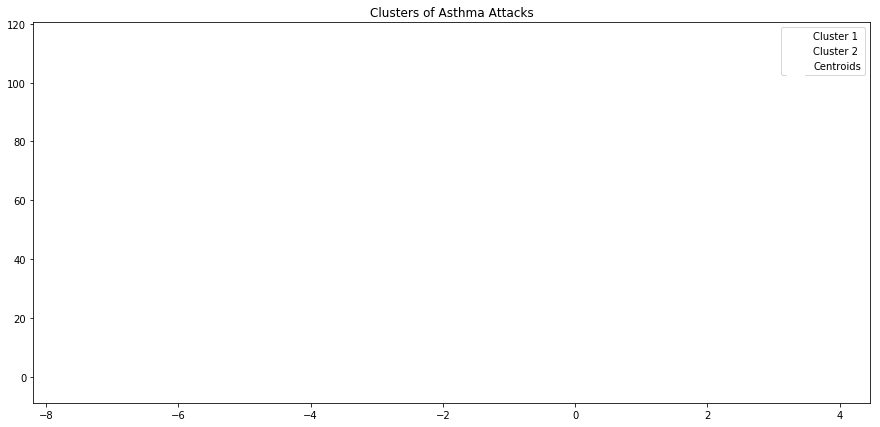

In [45]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(df[y_kmeans == 0, 0],df[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(df[y_kmeans == 1, 0], df[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of Asthma Attacks')
plt.legend()
plt.show()